## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 04.03.2020

__Дедлайн:__ 23:59 17.03.2020

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 16,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 16, а максимальное число дополнительных баллов, которые пойдут в бонус — 2 (в бонус идет только целое число баллов). Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5 баллов)

In [22]:
import numpy as np

### Реализуйте две функции расстояния (1 балл)
- Евклидова метрика
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(0.5 балла)}
$$
- метрика Манхэттена
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(0.5 балла)}
$$
Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m, )`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n, )`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [5]:
def euclidian_metric(X, x):
    distances = np.apply_along_axis(lambda l: l - x, 1, X)
    distances = np.apply_along_axis(lambda x: np.power(np.sum(x ** 2), 0.5), 1, distances)
    return distances

In [6]:
def manhattan_metric(X, x):
    distances = np.apply_along_axis(lambda l: l - x, 1, X)
    distances = np.apply_along_axis(lambda x: np.sum(np.absolute(x)), 1, distances)
    return distances

In [7]:
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

In [8]:
assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))

In [9]:
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

- Реалиуйте данный класс для равномерных весов (то есть $w_i = \frac{1}{k}$) (__3 балла__)
- Реалиуйте возможность передать данному классу параметр `weights='distance'`, чтобы реализовывался взвешенный алгоритм kNN с весами, обратными расстояниям (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$, где $d(x, y)$ - функция расстояния) (__1 балл__)

В данном классе должны быть реализованы методы `.fit` и `.predict`. Однако, для удобства может оказаться полезным реализовать еще некоторые вспомогательные методы, например, функции расстояния.

In [71]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        
        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        # your code here
        
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        # your code here         
        if self.metric == 'euclid':
            distances = np.apply_along_axis(lambda x: euclidian_metric(self.X_train, x), 1, X_test)
        elif self.metric == 'manhattan':
            distances = np.apply_along_axis(lambda x: manhattan_metric(self.X_train, x), 1, X_test)
        idx = np.apply_along_axis(lambda x: np.argpartition(x, self.k)[:self.k], 1, distances)
        if self.weights == 'uniform':
            y_pred = np.apply_along_axis(lambda x: np.mean(y_train[x]), 1, idx)
        elif self.weights == 'distance':
            distance_weights = np.apply_along_axis(lambda x: 1 / x[np.argpartition(x, self.k)[:self.k]], 1, distances)
            nearest_y = np.apply_along_axis(lambda x: y_train[x], 1, idx)
            distance_weights_sum = np.tile(np.apply_along_axis(np.sum, 1, distance_weights), (self.k, 1))
            y_pred = nearest_y * distance_weights
            y_pred = np.apply_along_axis(np.sum, 1, y_pred)
            y_pred = y_pred / distance_weights_sum
        return y_pred

#### Проверим, что наш knn и соответствующий knn из sklearn выдает одинаковые (ну, или почти одинаковые) результаты.

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

- Проверка для евклидовой метрики

In [29]:
knn = KNN(metric='euclid')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для манхэттенской метрики

In [30]:
knn = KNN(metric='manhattan')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для взвешенных весов

In [73]:
knn = KNN(metric='euclid', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

In [72]:
knn = KNN(metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

# Линейная регрессия своими руками (5 баллов)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Чему будет равна производная данной функции по $\hat{y}$?

__Вспомните, что такое вектор $\hat{y}$? Как он зависит от $X$ и $w$?__

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [59]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1 балл)

In [25]:
def huber_loss(x, y, w, delta):
    """
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    loss - scalar
    """
    Y = x @ w
    if np.abs(y - Y) <= delta:
        loss = 1 / 2 * (y - Y) ** 2
    else:
        loss = delta * np.abs(y - Y) - 1 / 2 * delta ** 2
        
    return loss

def huber_grad(x, y, w, delta):
    """
    INPUT:
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    grad - np.array shape=(d,)
    """
    Y = x @ w
    
    if np.abs(y - Y) <= delta:
        grad = (y - Y) * -x
    else:
        grad = np.sign(y - Y) * -x
        
    return grad

Небольшие проверки для вашего удобства

In [126]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

In [127]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 49.2
delta = 1

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

Так будет выглядеть график нашей функции потерь. Можете (это не обязательное требование) проверить, что ваш результат будет выглядеть так же.

### А теперь уже и саму линейную регрессию (4 балла)

In [50]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        
        В этой функции вы должны инициализировать веса нулями, а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс на каждой итерации тоже будет неплохо)
        """
        self.w = np.zeros(X_train.shape[1])
        self.loss_history = [self.calc_loss(X_train, y_train)]
        
        for i in range(self.max_iter):
            grad = self.calc_gradient(X_train, y_train)
            
            w_new = self.w - self.eta * grad
            
            loss = self.calc_loss(X_train, y_train)
            self.loss_history.append(loss)
            
            if np.linalg.norm(self.w - w_new) <= self.tol:
                w = self.w_new
                break
            
            self.w = w_new
        
        return self.loss_history
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Просто предсказать ответы с помощью обученных весов
        """
        y_pred = X_test @ self.w

        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """
        grad = np.zeros_like(self.w)
        
        for x_i, y_i in zip(X, y):
            grad += huber_grad(x_i, y_i, self.w, delta=1)
        
        grad /= X.shape[0]
        return grad 
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как сумма loss'ов для каждого 
        примера, поделить на размер выборки
        """
        
        loss = 0
        
        for x_i, y_i in zip(X, y):
            loss += huber_loss(x_i, y_i, self.w, delta=1)
        
        loss /= X.shape[0]
        
        return loss

In [51]:
lr = LinearRegressionHuber()

In [52]:
loss_history = lr.fit(X_train, y_train)

Постройте график зависимости функции потерь от итерации

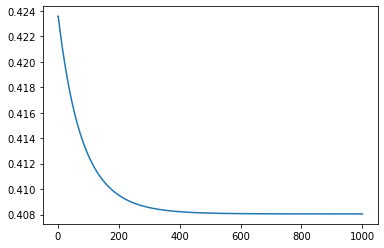

In [60]:
plt.plot(loss_history)

# Практика (7 баллов)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [ ]:
data = pd.read_csv('train.csv', header=0)

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
data.drop('Id', axis=1, inplace=True)

## 1 (1 балл)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете? Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [ ]:
# your code here

## 2 (0.5 балла)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование.

In [ ]:
# your code here

## 3 (0.5 балла)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# your code here

## 5 (0.5 балла)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [ ]:
# your code here

## 6 (0.5 балла)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

In [ ]:
# your code here

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('SalePrice', axis=1),
                                                  np.log1p(data['SalePrice']), random_state=17032019)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

## 7 (2 балла)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

(Если вдруг забыли что такое Lasso и Ridge - https://habr.com/ru/post/328760/)

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [ ]:
# your code here

## 8 (0.5 балла)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [ ]:
# your code here

## 9 (0.5 балла)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [ ]:
# your code here

## 10* (1 балл)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# your code here

# Теория (бонусная часть)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Вычислите производную сигмоидной функции

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

и выразите ее через $\sigma(x)$.

*(your solution here)*

## 2* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

Вам может показаться полезной эта ссылка https://medium.com/@gennadylaptev/median-and-mae-3e85f92df2d7

*(your solution here)*